<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

Lambda School Data Science

*Unit 4, Sprint 1, Module 1 Assignment*

---

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

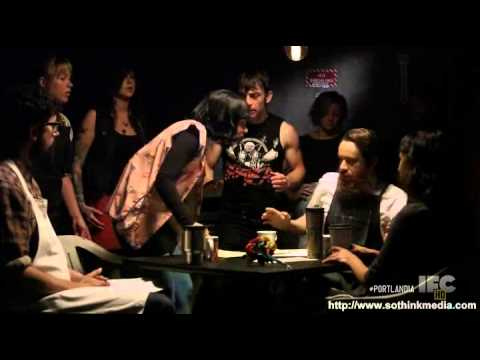

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\IshGish\\Google Drive\\Z - Mine\\Programming\\Lambda\\DS9\\U4\\W1'

## Data Cleaning

In [1]:
import pandas as pd


url   = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

shops['star_rating']      = shops['star_rating'].str.extract('(\d.\d)').astype('float').astype('int')
shops['full_review_text'] = shops['full_review_text'].str.replace('\s?\d+/\d+/\d+ (\d+ check-in\D? )?(\s?Listed in \S+ \S+ )?', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('\s?$', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('!|,|\.', '')

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,Love love loved the atmosphere Every corner of...,5
1,The Factory - Cafe With a Soul,Austin Ambiance in Austin BEAUTIFUL Love the a...,4
2,The Factory - Cafe With a Soul,I loved the eclectic and homey plush decor and...,4
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4


In [2]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    import re
    
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [3]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [4]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

### Stop Words

In [5]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

### Lemmitization **OR** Stemming

Basically we take words that are all kind of similar and just group them all together. So, "battery" and "batteries" should be together.

Stemming instead just removes the end of the word like, 'ed' or 'ing' and makes them all the same word that way.

## How do we want to analyze these coffee shop tokens?

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [33]:
# To make this easier on me I'm going to set it up to only take in the dataframe and the number for the ratings,
# that way all I need to do is run them below.

def function_thingy(dataframe, listy):
    df         = dataframe.copy()
    df         = df[df['star_rating'].isin(listy)]
    tokens     = []
    STOP_WORDS = nlp.Defaults.stop_words.union(['a', 'and', 'the', 'in', 'it', 'was', 'of', 'i', 'my',
                                                'you', 'with', 'they', 'that', 'for', 'this', 'but',
                                                'is', 'to', 'i\'m', 'it\'s', 'i\'ve', 'don\'t', 'place',
                                                '-', 'time', '', ' '
                                               ])
    
    for doc in tokenizer.pipe(df['full_review_text'], batch_size = 500):
        doc_tokens = []

        for token in doc:
            if token.text.lower() not in STOP_WORDS:
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens
    wc           = count(df['tokens'])
    
    return df, wc

In [7]:
def count(docs):
    word_counts = Counter()
    appears_in  = Counter()
    total_docs  = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp                = zip(word_counts.keys(), word_counts.values())

    wc                  = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank']          = wc['count'].rank(method='first', ascending=False)
    total               = wc['count'].sum()

    wc['pct_total']     = wc['count'].apply(lambda x: x / total)

    wc                  = wc.sort_values(by = 'rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns = ['word', 'appears_in'])
    wc = ac.merge(wc, on = 'word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by = 'rank')

### Plots

In [9]:
def line_plot(df):
    import seaborn as sns

    wc = count(df['tokens'])

    return sns.lineplot(x    = 'rank'
                       ,y    = 'cul_pct_total'
                       ,data = wc
                       )

In [10]:
def squarify_plot(df):
    import squarify
    import matplotlib.pyplot as plt
    
    
    wc       = count(df['tokens'])
    wc_top20 = wc[wc['rank'] <= 20]

    squarify.plot(sizes = wc_top20['pct_total']
                 ,label = wc_top20['word']
                 ,alpha = .8
                 )

    plt.axis('off')
    return plt.show()

### Good Coffee Shops

Only checking rows with ratings of 4 or better.

In [34]:
gdf, wc = function_thingy(shops, [4, 5])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,coffee,3879,8013,1.0,0.028933,0.028933,0.631759
115,great,2479,3424,2.0,0.012363,0.041296,0.403746
211,good,2165,3030,3.0,0.010941,0.052236,0.352606
207,like,1537,2172,4.0,0.007843,0.060079,0.250326
41,austin,1457,1832,5.0,0.006615,0.066694,0.237296


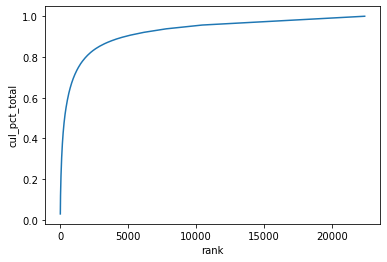

In [35]:
line_plot(gdf)

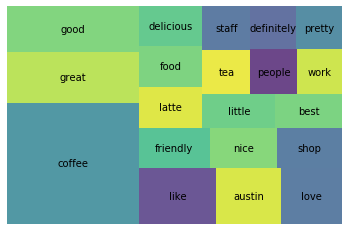

In [36]:
squarify_plot(gdf)

### Bad Coffee Shops

This code is going to be feffectively the same thing as the previous but for ratings 3 and below.

In [37]:
bdf, wc = function_thingy(shops, [4, 5])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,coffee,3879,8013,1.0,0.028933,0.028933,0.631759
115,great,2479,3424,2.0,0.012363,0.041296,0.403746
211,good,2165,3030,3.0,0.010941,0.052236,0.352606
207,like,1537,2172,4.0,0.007843,0.060079,0.250326
41,austin,1457,1832,5.0,0.006615,0.066694,0.237296


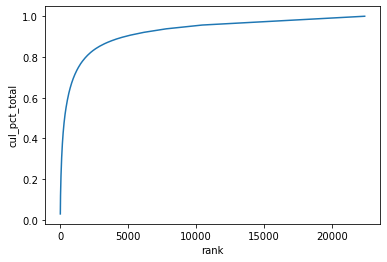

In [39]:
line_plot(bdf)

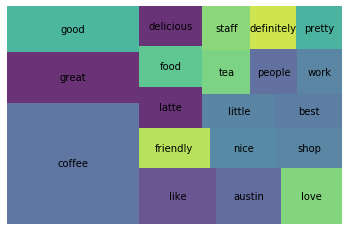

In [40]:
squarify_plot(bdf)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

